In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the iris dataset
data = load_iris()
X = data.data                      # Extracting features
y = data.target                    # True labels, not used in the k-means clustering
species_names = data.target_names  # Names of the species

In [10]:
X.shape, y.shape

((150, 4), (150,))

In [13]:
X[0:3], y[0:3], species_names

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([0, 0, 0]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

The `Iris Dataset` is a classic dataset in the field of machine learning. It is included in the scikit-learn library and can be loaded using the `load_iris` function. The dataset contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The goal is to classify the iris flowers into one of three species: setosa, versicolor, or virginica.

- Sepal length = the length of the sepal (in cm)
- Sepal width = the width of the sepal (in cm)
- Petal length = the length of the petal (in cm)
- Petal width = the width of the petal (in cm)

- Sepal = porzó
- Petal = szirom

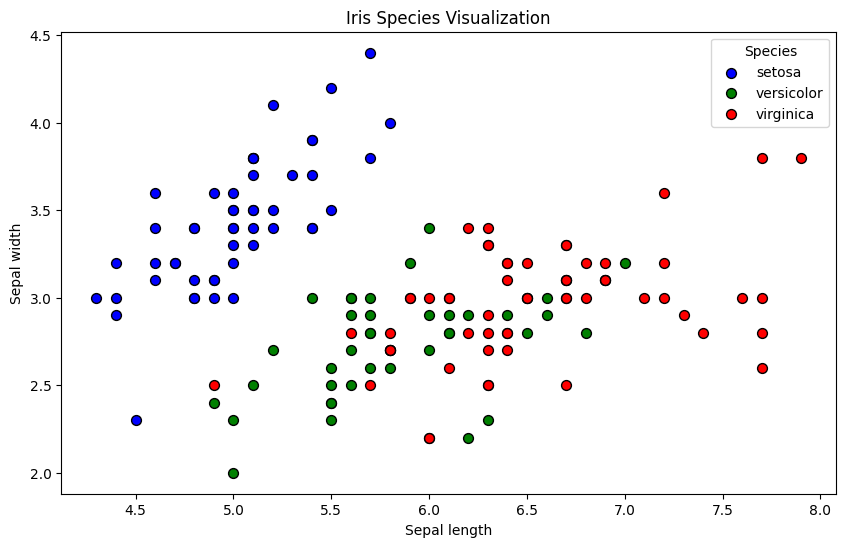

In [14]:
species_names = data.target_names  # Names of the species

# Plotting each species with a separate scatter call
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']  # Colors for the different species
for i in range(len(species_names)):
    # Select only data points that belong to the i-th species
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=species_names[i], marker='o', edgecolor='k', s=50)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Species Visualization')
plt.legend(title='Species')
plt.show()

In [18]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled[0:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [20]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # We expect 3 clusters, as there are 3 species
kmeans.fit(X_scaled)
labels = kmeans.labels_

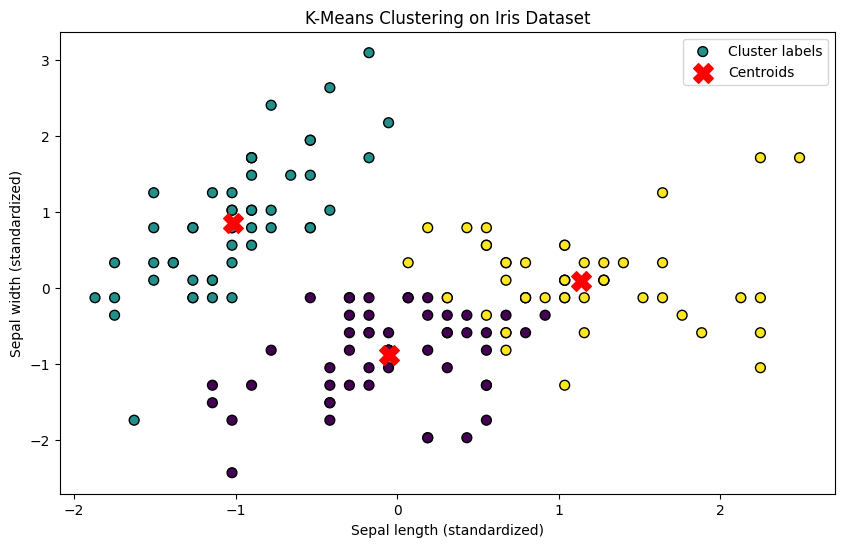

In [21]:
# Plotting the results
# For simplicity, we plot the first two dimensions (sepal length and width)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, label='Cluster labels')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering on Iris Dataset')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.legend()
plt.show()

In [23]:
X_scaled[5]*1.05

array([-0.56403644,  2.03678099, -1.22819996, -1.10478892])

In [27]:
kmeans.predict(np.array(X_scaled[5]*1.05).reshape(1, -1))

array([1], dtype=int32)